2024-05-30 15:07:35.531112: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-30 15:07:35.531460: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-30 15:07:35.534370: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-30 15:07:35.569752: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-30 15:07:36.460768: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

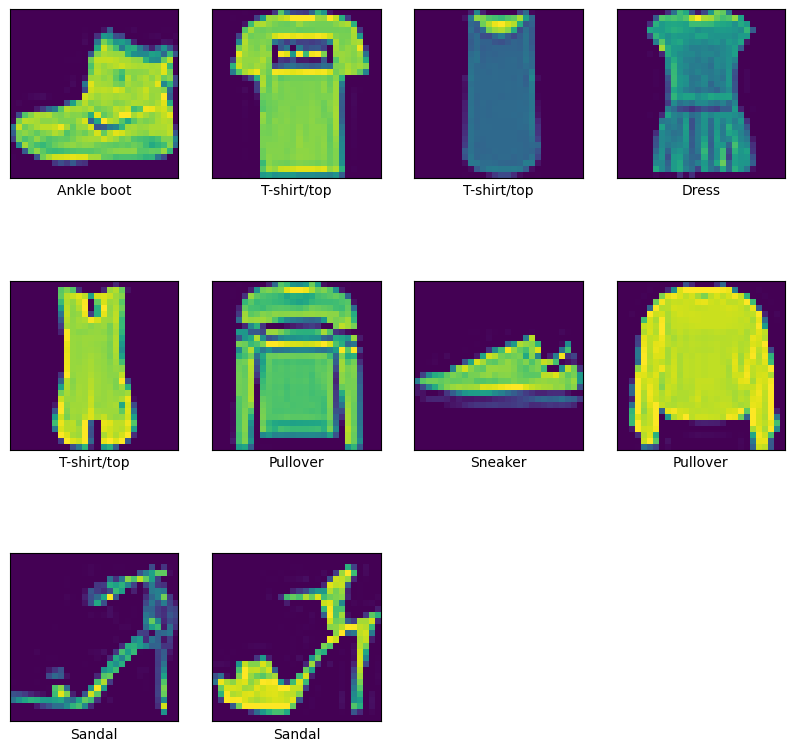

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, BatchNormalization

mnist = tf.keras.datasets.mnist
fashion_mnist = tf.keras.datasets.fashion_mnist

# Model load: MNIST / Fashion MNIST Dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(f_image_train, f_label_train), (f_image_test, f_label_test) = fashion_mnist.load_data()
# normalized iamges
f_image_train, f_image_test = f_image_train / 255.0, f_image_test / 255.0

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(3,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(f_image_train[i])
    plt.xlabel(class_names[f_label_train[i]])
plt.show()

In [2]:
# CNN
model = Sequential()
model.add(Conv2D(32,(2,2),activation="relu",
input_shape=(28,28,1)))
model.add(Conv2D(64,(2,2),activation="relu"))
model.add(Conv2D(128,(2,2),2,activation="relu"))
model.add(Conv2D(32,(2,2),activation="relu"))
model.add(Conv2D(64,(2,2),activation="relu"))
model.add(Conv2D(128,(2,2),2,activation="relu"))


# ANN
model.add(Flatten())
model.add(Dense(128,activation="sigmoid"))
model.add(Dense(10,activation="softmax"))

/home/ubuntu/workdir/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
model.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = "adam",
    metrics=["accuracy"])
history = model.fit(f_image_train, f_label_train, validation_data = (f_image_test, f_label_test), 
                    epochs=10, batch_size=10)
model.summary()
model.save('fashion_mnist_relu.h5')
with open('historyBatchReLu', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

Epoch 1/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 69s 11ms/step - accuracy: 0.7901 - loss: 0.5739 - val_accuracy: 0.8655 - val_loss: 0.3668
Epoch 2/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 97s 14ms/step - accuracy: 0.8831 - loss: 0.3154 - val_accuracy: 0.8667 - val_loss: 0.3561
Epoch 3/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 50s 8ms/step - accuracy: 0.8994 - loss: 0.2649 - val_accuracy: 0.8807 - val_loss: 0.3159
Epoch 4/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 107s 13ms/step - accuracy: 0.9108 - loss: 0.2356 - val_accuracy: 0.8947 - val_loss: 0.2872
Epoch 5/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 81s 12ms/step - accuracy: 0.9200 - loss: 0.2102 - val_accuracy: 0.9007 - val_loss: 0.2831
Epoch 6/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 60s 10ms/step - accuracy: 0.9285 - loss: 0.1906 - val_accuracy: 0.8972 - val_loss: 0.2934
Epoch 7/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 67s 11ms/step - accuracy: 0.9338 - loss: 0.1774 - val_accuracy: 0.9004 - val_loss: 0.2868
Epoch 8/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 60s 10ms/step - accuracy: 0.9350 -

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 27, 27, 32)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 32)     │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 5, 5, 128)      │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,529,696 (5.84 MB)

 Trainable params: 509,898 (1.95 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,019,798 (3.89 MB)

NameError: name 'pickle' is not defined

In [4]:
# 학습 이력 저장

import pickle
with open('historyRelu', 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

model = tf.keras.models.load_model('./fashion_mnist_relu.h5')
fashion_mnist = tf.keras.datasets.fashion_mnist
(f_image_train, f_label_train), (f_image_test, f_label_test) = fashion_mnist.load_data()
f_image_train, f_image_test = f_image_train / 255.0, f_image_test / 255.0
num = 10
predict = model.predict(f_image_train[:num])
print(f_label_train[:num])
print(" * Prediction, ", np.argmax(predict, axis = 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
[9 0 0 3 0 2 7 2 5 5]
 * Prediction,  [9 0 0 3 3 2 7 2 5 5]


In [8]:
def plot_combined_history(histories, titles):
    plt.figure(figsize=(12, 6))

    # Plot validation loss
    plt.subplot(1, 2, 1)
    for history in histories:
        plt.plot(history['val_loss'])
    plt.title('Model Validation Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(titles, loc='upper right')

    # Plot validation accuracy
    plt.subplot(1, 2, 2)
    for history in histories:
        plt.plot(history['val_accuracy'])
    plt.title('Model Validation Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(titles, loc='lower right')

    plt.tight_layout()
    plt.show()


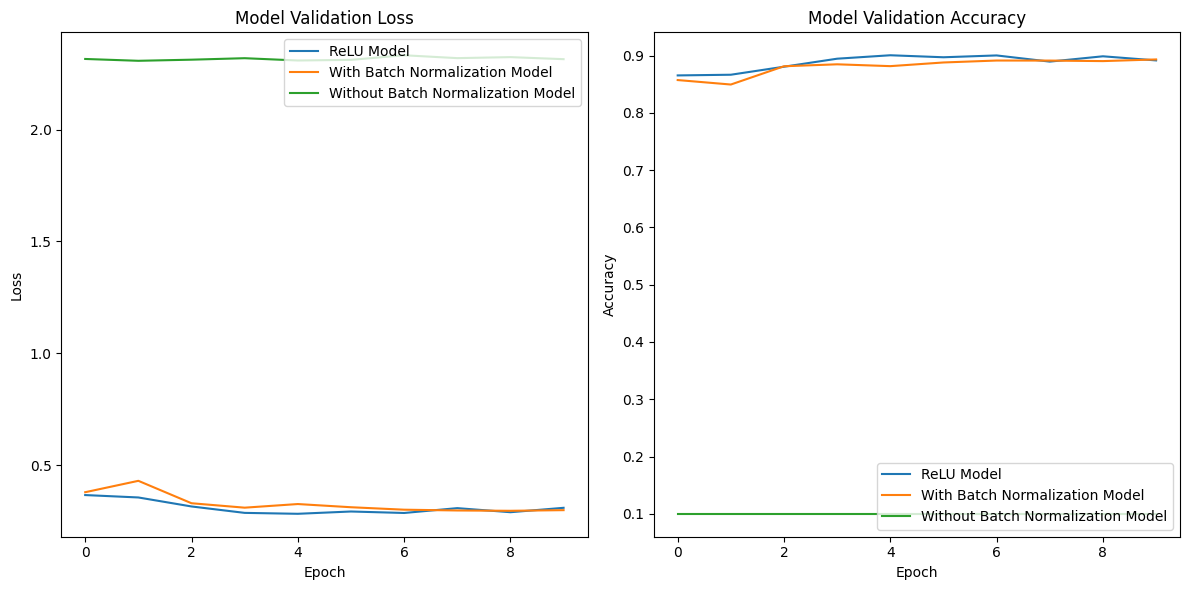

In [9]:
# 모델 파일 이름 및 학습 이력 파일 이름 설정
model_files = ['fashion_mnist_relu.h5', 'fashion_mnist_withbatch.h5', 'fashion_mnist_withoutbatch.h5']
history_files = ['historyRelu', 'historywithbatch', 'historywithoutbatch']
titles = ['ReLU Model', 'With Batch Normalization Model', 'Without Batch Normalization Model']

# 각 모델에 대한 학습 이력 로드
histories = []
for history_file in history_files:
    with open(history_file, 'rb') as file_pi:
        history = pickle.load(file_pi)
        histories.append(history)

# 그래프 그리기
plot_combined_history(histories, titles)
